In [4]:
import mediapipe as mp
import cv2
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

In [5]:
# Define transformations for train and test datasets
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 确保图片是灰度图
    transforms.Resize((48, 48)),  # 确保图片大小为 48x48
    transforms.RandomHorizontalFlip(),  # 数据增强，随机水平翻转
    transforms.ToTensor(),  # 转换为 PyTorch 张量
    transforms.Normalize(mean=[0.5], std=[0.5])  # 对灰度图进行归一化，mean 和 std 为单值
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 确保图片是灰度图
    transforms.Resize((48, 48)),  # 确保图片大小为 48x48
    transforms.ToTensor(),  # 转换为 PyTorch 张量
    transforms.Normalize(mean=[0.5], std=[0.5])  # 归一化
])

# Base dataset directory
base_path = "/CSCI2952X/datasets/fer2013/"

# Define paths to your dataset
train_dir = os.path.join(base_path, "train")
test_dir = os.path.join(base_path, "test")

# Load datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [8]:
# Initialize Mediapipe face mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

def extract_mediapipe_landmarks(image_tensor):
    """
    Extract facial landmarks using Mediapipe from a PyTorch tensor image.
    """
    # Convert tensor to NumPy format and prepare for Mediapipe
    image_np = (image_tensor.numpy() * 255).astype('uint8').squeeze(0)  # Grayscale image
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)  # Convert to RGB

    # Detect face landmarks
    results = face_mesh.process(image_rgb)
    if results.multi_face_landmarks:
        landmarks = []
        for face_landmarks in results.multi_face_landmarks:
            for lm in face_landmarks.landmark:
                x = int(lm.x * image_np.shape[1])
                y = int(lm.y * image_np.shape[0])
                landmarks.append((x, y))
        return landmarks
    return None  # No face detected

I0000 00:00:1732225006.620668    7389 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732225006.681290    7524 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.03), renderer: NVIDIA GeForce RTX 3090/PCIe/SSE2


W0000 00:00:1732225006.684909    7514 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732225006.701780    7517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Processing batch 1
Image 0 (Label 6) Landmarks: [(22, 31), (23, 26), (23, 28), (22, 22), (23, 24), (23, 23), (23, 18), (11, 19), (23, 14), (23, 12), (24, 5), (22, 31), (22, 32), (22, 32), (22, 38), (22, 39), (22, 39), (21, 40), (22, 40), (23, 27), (22, 27), (4, 13), (16, 20), (14, 20), (13, 20), (10, 19), (17, 20), (14, 15), (15, 15), (12, 15), (11, 16), (9, 20), (16, 41), (11, 18), (4, 19), (7, 19), (15, 26), (21, 31), (21, 32), (19, 32), (18, 33), (19, 32), (19, 33), (16, 36), (22, 26), (22, 25), (9, 15), (18, 22), (18, 26), (18, 25), (10, 26), (22, 23), (13, 13), (11, 14), (6, 10), (20, 15), (17, 16), (15, 35), (6, 34), (20, 27), (21, 27), (17, 35), (17, 35), (10, 12), (18, 27), (16, 13), (16, 12), (14, 6), (8, 11), (15, 8), (8, 14), (6, 13), (21, 31), (19, 32), (18, 33), (20, 27), (17, 35), (17, 36), (17, 35), (20, 26), (19, 33), (20, 33), (21, 32), (20, 40), (20, 40), (20, 39), (20, 39), (20, 38), (19, 37), (18, 37), (18, 37), (17, 38), (16, 31), (4, 26), (23, 27), (18, 36), (18, 

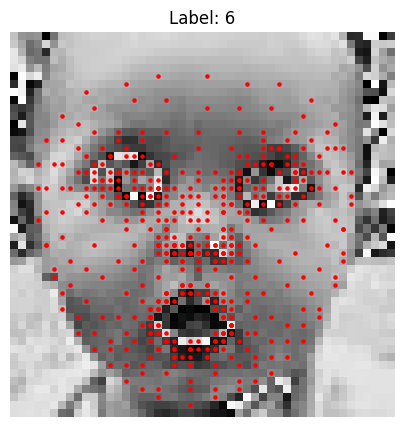

Image 1 (Label 6) Landmarks: [(21, 31), (17, 27), (19, 29), (18, 21), (17, 26), (18, 23), (21, 17), (13, 15), (22, 12), (22, 9), (23, 1), (21, 32), (21, 32), (22, 32), (22, 32), (21, 33), (21, 34), (21, 34), (21, 37), (18, 28), (17, 28), (14, 5), (16, 17), (15, 17), (14, 16), (13, 15), (17, 17), (15, 12), (17, 13), (14, 12), (13, 12), (12, 16), (18, 38), (13, 14), (14, 13), (12, 14), (15, 23), (20, 31), (20, 32), (19, 31), (18, 31), (19, 31), (19, 31), (17, 33), (16, 27), (16, 25), (13, 10), (18, 20), (16, 25), (16, 25), (13, 22), (17, 23), (15, 9), (13, 9), (14, 3), (19, 12), (18, 13), (16, 32), (17, 27), (17, 27), (17, 28), (17, 31), (18, 31), (13, 8), (16, 26), (17, 10), (17, 8), (17, 0), (14, 5), (16, 4), (12, 9), (14, 7), (20, 31), (19, 31), (18, 31), (17, 27), (18, 31), (18, 31), (18, 31), (16, 26), (19, 31), (20, 32), (20, 32), (19, 36), (20, 34), (20, 33), (20, 33), (20, 32), (19, 31), (19, 32), (18, 32), (18, 32), (16, 30), (17, 19), (18, 28), (19, 31), (18, 31), (18, 28), (17

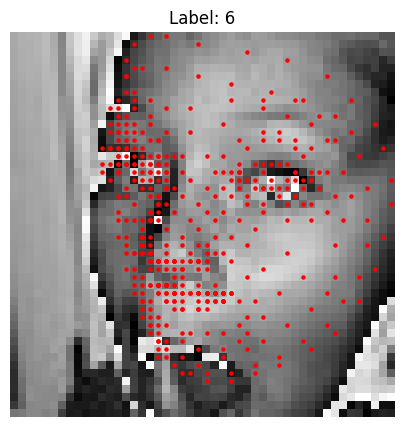

Image 2 (Label 6): No face detected
Image 3 (Label 3) Landmarks: [(20, 38), (20, 34), (20, 35), (19, 30), (20, 33), (20, 31), (20, 26), (10, 25), (20, 22), (19, 20), (19, 13), (20, 39), (20, 39), (20, 39), (20, 39), (20, 40), (20, 41), (20, 41), (21, 42), (20, 35), (19, 35), (6, 20), (14, 26), (13, 27), (12, 27), (10, 26), (15, 26), (12, 22), (13, 22), (10, 23), (10, 23), (9, 27), (17, 44), (10, 25), (6, 26), (8, 25), (14, 32), (18, 38), (19, 39), (17, 38), (16, 39), (17, 39), (17, 39), (15, 40), (19, 34), (19, 33), (8, 21), (16, 29), (16, 33), (16, 33), (10, 32), (19, 31), (10, 20), (8, 20), (7, 17), (16, 21), (14, 23), (14, 39), (9, 37), (17, 34), (18, 35), (15, 39), (15, 39), (8, 19), (16, 34), (12, 20), (12, 19), (11, 14), (7, 19), (12, 17), (7, 20), (6, 21), (18, 39), (17, 39), (16, 39), (17, 34), (15, 39), (16, 39), (15, 39), (18, 34), (17, 39), (18, 39), (19, 39), (19, 42), (18, 41), (18, 41), (19, 40), (19, 39), (17, 39), (17, 40), (16, 40), (16, 40), (15, 37), (7, 31), (20, 35

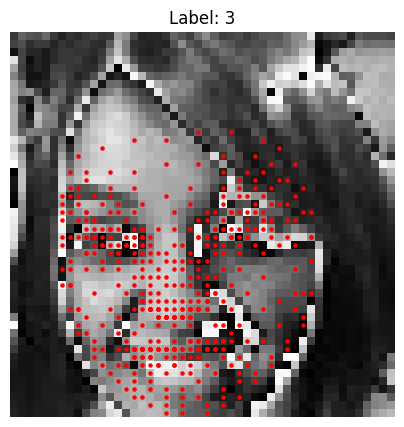

Image 4 (Label 5): No face detected
Image 5 (Label 6): No face detected
Image 6 (Label 2): No face detected
Image 7 (Label 2): No face detected
Image 8 (Label 2) Landmarks: [(31, 36), (24, 29), (24, 31), (23, 23), (24, 28), (24, 25), (25, 18), (13, 17), (25, 13), (25, 10), (26, 1), (31, 37), (30, 38), (30, 38), (30, 38), (31, 39), (31, 40), (30, 41), (25, 41), (24, 30), (22, 30), (9, 9), (17, 18), (16, 19), (14, 19), (12, 18), (19, 18), (15, 14), (17, 14), (14, 14), (12, 15), (11, 19), (19, 43), (12, 17), (8, 17), (10, 18), (16, 27), (28, 36), (28, 38), (26, 37), (24, 37), (26, 38), (24, 38), (18, 38), (22, 29), (22, 28), (11, 13), (20, 22), (19, 29), (19, 28), (11, 26), (22, 25), (14, 12), (12, 12), (10, 6), (21, 14), (19, 15), (16, 37), (10, 33), (20, 30), (21, 30), (21, 38), (21, 38), (12, 11), (19, 29), (17, 12), (17, 11), (16, 2), (10, 8), (16, 6), (10, 12), (9, 10), (28, 37), (26, 37), (24, 38), (21, 30), (21, 38), (22, 39), (22, 38), (21, 29), (24, 38), (26, 38), (28, 38), (23, 

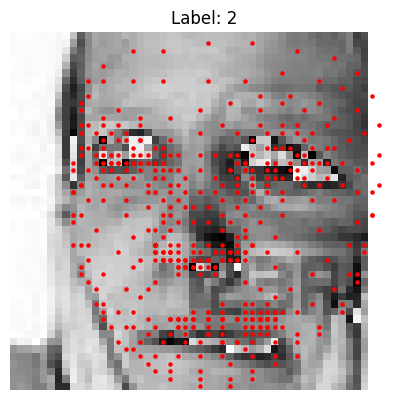

Image 9 (Label 2): No face detected
Image 10 (Label 2) Landmarks: [(25, 33), (24, 28), (24, 29), (22, 23), (23, 27), (23, 25), (23, 20), (12, 19), (22, 15), (22, 13), (21, 6), (25, 34), (25, 34), (25, 35), (25, 36), (25, 37), (25, 38), (25, 39), (26, 39), (24, 29), (22, 29), (7, 14), (16, 21), (15, 21), (13, 21), (11, 20), (17, 20), (14, 16), (15, 16), (12, 16), (11, 17), (10, 21), (21, 40), (11, 19), (7, 20), (9, 20), (16, 27), (22, 33), (23, 34), (20, 34), (19, 35), (21, 35), (21, 35), (18, 36), (22, 28), (22, 27), (9, 16), (19, 23), (19, 28), (19, 27), (11, 27), (22, 25), (13, 14), (11, 15), (7, 11), (19, 15), (17, 17), (17, 34), (11, 33), (20, 28), (21, 29), (19, 36), (19, 36), (10, 14), (19, 28), (15, 14), (15, 13), (12, 8), (8, 12), (14, 10), (8, 15), (7, 15), (23, 34), (21, 34), (20, 35), (20, 29), (19, 36), (19, 37), (19, 36), (21, 28), (21, 35), (22, 35), (23, 35), (24, 39), (23, 39), (23, 38), (23, 37), (23, 36), (21, 36), (20, 37), (20, 37), (20, 38), (18, 32), (8, 26), (24,

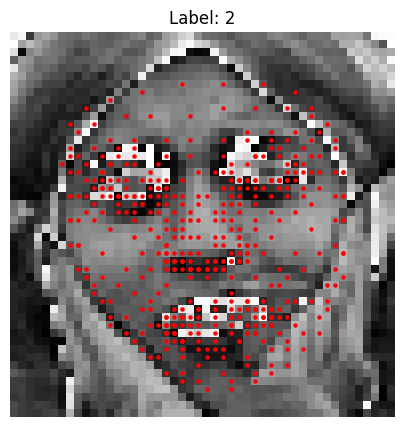

Image 11 (Label 4): No face detected
Image 12 (Label 6): No face detected
Image 13 (Label 3) Landmarks: [(22, 35), (20, 29), (21, 30), (20, 24), (20, 28), (20, 26), (22, 20), (13, 18), (22, 16), (22, 14), (23, 6), (22, 35), (22, 36), (22, 36), (22, 36), (22, 37), (22, 37), (22, 38), (21, 40), (20, 30), (19, 30), (10, 12), (16, 20), (15, 20), (14, 20), (12, 18), (17, 20), (15, 15), (16, 16), (14, 15), (13, 16), (11, 19), (16, 41), (12, 17), (9, 19), (10, 18), (14, 27), (20, 34), (20, 35), (18, 34), (16, 35), (18, 35), (17, 35), (14, 36), (19, 29), (19, 28), (11, 14), (18, 23), (16, 28), (16, 27), (10, 26), (19, 26), (14, 13), (12, 13), (11, 10), (19, 15), (17, 16), (13, 34), (10, 33), (17, 29), (18, 30), (15, 35), (15, 35), (12, 12), (16, 29), (16, 13), (16, 12), (15, 7), (11, 11), (16, 10), (10, 13), (10, 13), (20, 35), (18, 35), (17, 35), (17, 29), (15, 35), (16, 36), (16, 35), (18, 29), (18, 35), (19, 36), (20, 36), (19, 40), (20, 38), (20, 37), (20, 36), (20, 36), (18, 36), (17, 36)

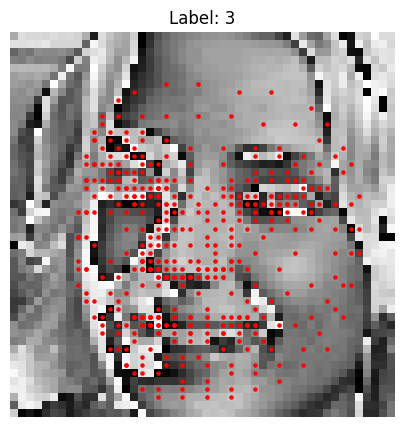

Image 14 (Label 6): No face detected
Image 15 (Label 3) Landmarks: [(22, 35), (22, 31), (22, 32), (20, 25), (22, 29), (22, 27), (22, 20), (10, 19), (22, 15), (22, 13), (22, 6), (22, 35), (22, 35), (22, 36), (22, 40), (22, 40), (22, 41), (22, 42), (22, 41), (22, 31), (20, 31), (5, 12), (15, 20), (14, 20), (12, 20), (9, 19), (17, 20), (12, 16), (14, 16), (11, 16), (10, 17), (8, 20), (16, 42), (9, 19), (4, 19), (7, 19), (14, 28), (20, 34), (20, 35), (18, 34), (16, 35), (18, 35), (17, 35), (15, 37), (20, 30), (20, 29), (7, 15), (17, 23), (16, 29), (16, 28), (9, 27), (20, 27), (11, 14), (9, 14), (6, 10), (18, 16), (16, 17), (14, 36), (6, 32), (18, 30), (19, 31), (15, 35), (15, 36), (8, 13), (16, 30), (14, 14), (14, 13), (12, 7), (7, 11), (13, 10), (6, 14), (6, 13), (20, 35), (18, 35), (17, 35), (18, 30), (15, 36), (16, 37), (16, 36), (19, 30), (17, 35), (19, 35), (20, 36), (20, 41), (20, 42), (20, 41), (20, 40), (20, 39), (17, 37), (17, 38), (17, 38), (16, 38), (15, 34), (5, 24), (22, 31), 

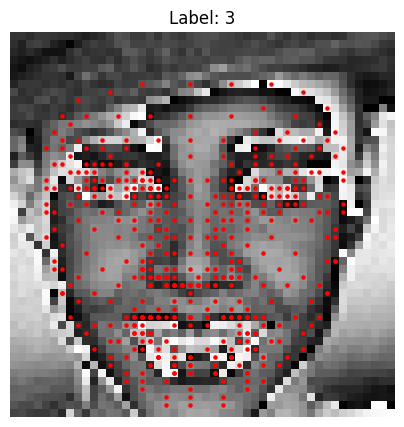

Image 16 (Label 5): No face detected
Image 17 (Label 3): No face detected
Image 18 (Label 4): No face detected
Image 19 (Label 2) Landmarks: [(25, 33), (24, 30), (24, 31), (22, 24), (24, 28), (24, 26), (23, 20), (10, 20), (23, 16), (23, 14), (22, 4), (25, 34), (25, 34), (25, 34), (25, 43), (25, 43), (25, 44), (25, 44), (24, 43), (24, 31), (22, 31), (4, 13), (15, 21), (14, 21), (12, 22), (9, 21), (17, 21), (12, 17), (14, 17), (11, 18), (9, 18), (8, 22), (18, 45), (9, 20), (3, 21), (6, 21), (14, 28), (22, 33), (22, 34), (19, 34), (17, 35), (20, 35), (18, 36), (15, 39), (22, 30), (22, 29), (7, 17), (18, 24), (17, 30), (17, 29), (9, 28), (22, 26), (12, 15), (9, 16), (5, 10), (19, 17), (16, 18), (14, 37), (5, 37), (19, 31), (20, 31), (15, 38), (15, 38), (8, 15), (17, 30), (15, 16), (15, 14), (12, 6), (7, 12), (13, 10), (6, 16), (5, 15), (22, 34), (19, 35), (17, 36), (19, 31), (15, 38), (16, 40), (16, 38), (20, 30), (18, 36), (20, 35), (22, 35), (22, 43), (21, 44), (22, 44), (22, 43), (22, 4

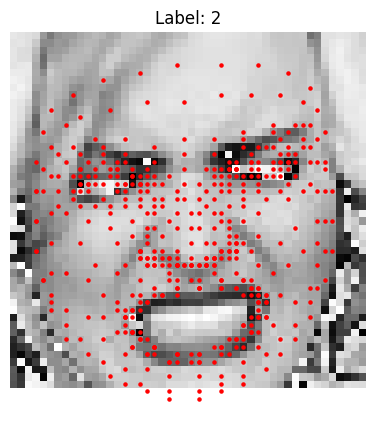

Image 20 (Label 0): No face detected
Image 21 (Label 5): No face detected
Image 22 (Label 2) Landmarks: [(26, 36), (28, 31), (27, 32), (25, 25), (27, 29), (27, 27), (26, 21), (14, 21), (25, 15), (24, 13), (23, 5), (26, 36), (27, 36), (27, 37), (27, 38), (27, 39), (28, 40), (28, 40), (28, 40), (28, 31), (26, 31), (6, 14), (18, 21), (17, 22), (16, 22), (13, 22), (20, 21), (16, 18), (17, 18), (14, 18), (13, 19), (12, 23), (22, 42), (13, 21), (7, 21), (10, 22), (18, 29), (24, 36), (25, 37), (22, 36), (21, 37), (23, 37), (22, 37), (20, 38), (26, 31), (26, 29), (11, 18), (21, 24), (22, 30), (21, 29), (13, 29), (25, 27), (15, 16), (13, 17), (7, 11), (21, 16), (19, 18), (18, 37), (10, 34), (23, 31), (24, 31), (20, 38), (20, 38), (11, 16), (22, 31), (18, 15), (17, 14), (14, 7), (9, 13), (15, 10), (10, 17), (8, 15), (24, 36), (23, 37), (22, 37), (23, 31), (20, 38), (21, 38), (21, 38), (24, 31), (22, 37), (24, 37), (25, 37), (25, 40), (25, 40), (25, 40), (25, 39), (25, 38), (23, 38), (22, 38), (2

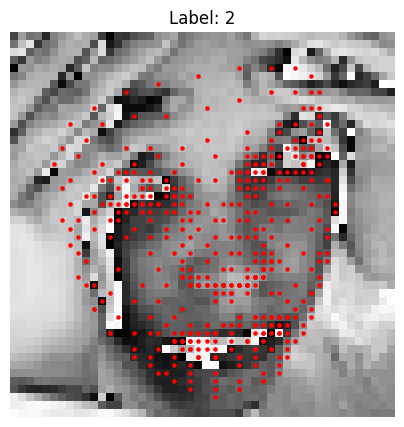

Image 23 (Label 0): No face detected
Image 24 (Label 4): No face detected
Image 25 (Label 3): No face detected
Image 26 (Label 6) Landmarks: [(21, 35), (23, 31), (23, 32), (22, 25), (23, 29), (23, 27), (23, 21), (9, 19), (23, 15), (23, 13), (23, 4), (21, 35), (21, 35), (21, 36), (21, 36), (21, 37), (21, 38), (21, 38), (23, 40), (23, 31), (21, 31), (4, 11), (15, 20), (13, 21), (12, 21), (9, 19), (17, 20), (12, 15), (14, 15), (10, 15), (9, 16), (8, 20), (17, 42), (9, 19), (4, 18), (6, 18), (14, 28), (19, 34), (19, 35), (18, 35), (16, 35), (18, 35), (17, 35), (15, 36), (22, 31), (22, 29), (6, 14), (17, 24), (18, 29), (17, 28), (9, 27), (22, 27), (10, 12), (8, 13), (6, 9), (18, 14), (16, 16), (14, 35), (6, 32), (19, 30), (20, 31), (15, 35), (16, 35), (7, 11), (17, 30), (13, 13), (13, 11), (12, 5), (7, 10), (13, 9), (5, 13), (5, 12), (19, 35), (18, 35), (17, 35), (19, 30), (15, 35), (16, 36), (16, 35), (20, 30), (17, 35), (18, 35), (20, 36), (21, 40), (19, 38), (19, 37), (19, 37), (20, 36),

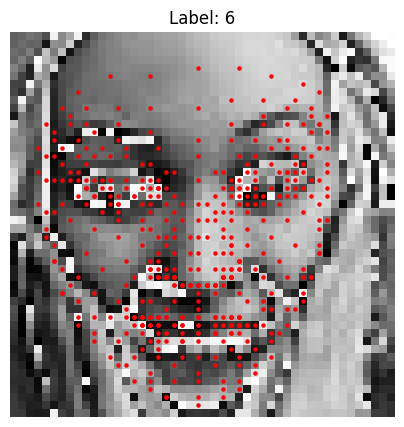

Image 27 (Label 6): No face detected
Image 28 (Label 4): No face detected
Image 29 (Label 5): No face detected
Image 30 (Label 5) Landmarks: [(24, 40), (24, 33), (23, 34), (22, 24), (24, 30), (24, 27), (23, 18), (7, 18), (23, 11), (23, 8), (22, -2), (24, 40), (24, 41), (24, 41), (24, 43), (24, 44), (24, 45), (24, 46), (23, 48), (24, 34), (21, 33), (0, 7), (13, 20), (11, 20), (9, 20), (6, 19), (15, 19), (10, 13), (13, 13), (8, 13), (6, 14), (5, 20), (16, 50), (6, 17), (0, 17), (3, 18), (12, 30), (21, 40), (21, 41), (18, 40), (16, 41), (19, 41), (16, 41), (13, 44), (22, 32), (22, 30), (4, 12), (16, 23), (16, 32), (16, 30), (6, 29), (22, 27), (9, 9), (6, 10), (1, 3), (18, 11), (15, 14), (12, 42), (2, 38), (18, 33), (20, 33), (13, 42), (13, 42), (5, 9), (16, 32), (13, 10), (12, 7), (10, -1), (3, 6), (11, 3), (3, 11), (1, 9), (21, 40), (18, 41), (16, 41), (19, 33), (13, 42), (14, 43), (13, 42), (19, 32), (17, 41), (19, 41), (21, 41), (20, 48), (21, 46), (21, 45), (21, 44), (21, 43), (17, 43

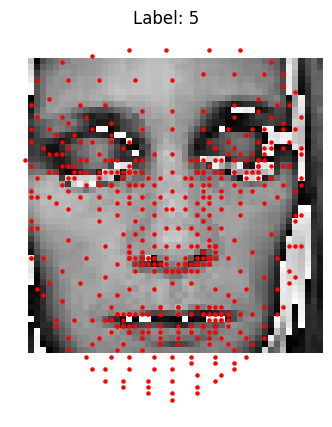

Image 31 (Label 4) Landmarks: [(22, 39), (23, 31), (23, 32), (22, 24), (23, 29), (23, 26), (24, 20), (9, 17), (24, 15), (24, 12), (25, 3), (22, 40), (22, 41), (22, 42), (22, 42), (22, 43), (22, 44), (22, 45), (22, 43), (23, 31), (21, 31), (4, 8), (15, 20), (13, 20), (11, 20), (9, 18), (17, 19), (12, 14), (15, 14), (10, 14), (9, 14), (7, 19), (15, 44), (9, 17), (2, 16), (5, 17), (14, 27), (20, 39), (20, 41), (17, 39), (16, 40), (18, 41), (17, 41), (14, 39), (21, 30), (21, 29), (6, 12), (17, 23), (17, 29), (17, 28), (8, 26), (21, 26), (11, 11), (8, 11), (5, 5), (19, 15), (16, 15), (13, 38), (4, 33), (18, 30), (20, 31), (14, 42), (15, 42), (7, 10), (17, 30), (14, 12), (14, 11), (13, 2), (6, 8), (14, 6), (5, 11), (5, 10), (20, 40), (18, 40), (16, 41), (19, 31), (14, 42), (15, 42), (15, 42), (19, 30), (17, 42), (18, 42), (20, 42), (20, 43), (19, 45), (20, 44), (20, 43), (20, 42), (17, 42), (17, 42), (16, 42), (16, 43), (15, 35), (2, 24), (23, 32), (16, 42), (16, 42), (20, 32), (17, 31), (20

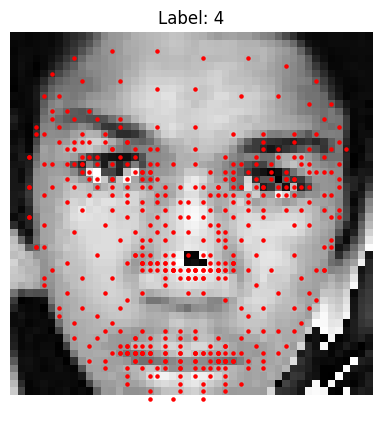

In [9]:
import matplotlib.pyplot as plt

# Iterate through the DataLoader and extract Mediapipe landmarks
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Processing batch {batch_idx + 1}")

    for i in range(len(images)):
        image = images[i]
        label = labels[i].item()

        # Extract Mediapipe landmarks for each image
        landmarks = extract_mediapipe_landmarks(image)
        if landmarks:
            print(f"Image {i} (Label {label}) Landmarks: {landmarks}")
            
            # Plot the image and landmarks
            image_np = (image.numpy() * 255).astype('uint8').squeeze(0)  # Convert to grayscale NumPy array
            plt.figure(figsize=(5, 5))
            plt.imshow(image_np, cmap='gray')  # Display the grayscale image
            plt.title(f"Label: {label}")
            plt.axis('off')

            # Plot landmarks on the image
            for x, y in landmarks:
                plt.scatter(x, y, c='red', s=5)  # Scatter plot for landmarks

            plt.show()

        else:
            print(f"Image {i} (Label {label}): No face detected")

    break  # Only process the first batch for demonstration